In [1]:
from collections.abc import Iterable
import numpy as np
import matplotlib.pyplot as plt

def np_rng(seed=None):
    return np.random.default_rng(seed=seed)

def conv2Dtranspose(inputs:np.array, kernel:np.array):
    if isinstance(inputs, Iterable) and not isinstance(inputs, np.ndarray):
        inputs = np.array(inputs)
    if isinstance(kernel, Iterable) and not isinstance(kernel, np.ndarray) and not isinstance(kernel, str):
        kernel = np.array(kernel)
    
    if isinstance(kernel, str):
        kernel_parms = kernel.split('_')
        if kernel_parms[0] == 'random':
            kernel_h, kernel_w = int(kernel_parms[1]), int(kernel_parms[2])
            kernel = np_rng().normal(size=(kernel_h, kernel_w))

    if inputs.ndim > 3 or (inputs.ndim == 3 and inputs.shape[2] > 1):
        raise Exception('Multichannel input not supported')
    if kernel.ndim > 3 or (kernel.ndim == 3 and kernel.shape[2] > 1):
        raise Exception('Multichannel kernel not supported')

    third_dim_present = (inputs.ndim == 3)
    if third_dim_present:
        inputs = np.reshape(inputs, [inputs.shape[0], -1])
    if kernel.ndim == 3:
        kernel = np.reshape(kernel, [kernel.shape[0], -1])

    outputs = np.zeros(shape=(inputs.shape[0] + kernel.shape[0] - 1, inputs.shape[1] + kernel.shape[1] - 1))
    for inputs_row in range(inputs.shape[0]):
        for inputs_col in range(inputs.shape[1]):
            for kernel_row in range(kernel.shape[0]):
                for kernel_col in range(kernel.shape[1]):
                    outputs[inputs_row + kernel_row, inputs_col + kernel_col] += inputs[inputs_row, inputs_col] \
                                                                                 * kernel[kernel_row, kernel_col]
    outputs = outputs - np.min(outputs)
    outputs = outputs / np.max(outputs)

    if third_dim_present:
        third_dim_present = np.reshape(outputs, (outputs.shape[0], outputs.shape[1], -1))

    return outputs

def conv_img(img, filt, iters=1):
    plt.imshow(img, cmap='gray')
    plt.show()

    newimg = img.copy()
    for i in range(iters):
        newimg = conv2Dtranspose(newimg, filt)

    print(newimg.shape)
    plt.imshow(newimg, cmap='gray')
    plt.show()

def rand_filter(shape, seed=None):
    return np_rng(seed).normal(size=shape)

def superimpose(canvas1, canvas2):
    if canvas1.ndim == 2:
        canvas1 = np.reshape(canvas1, newshape=(canvas1.shape[0], canvas1.shape[1], 1))
    if canvas2.ndim == 2:
        canvas2 = np.reshape(canvas2, newshape=(canvas2.shape[0], canvas2.shape[1], 1))

    canvas = np.zeros(shape=(max(canvas1.shape[0], canvas2.shape[0]), max(canvas1.shape[1], canvas2.shape[1]), 1))
    canvas += canvas1
    canvas += canvas2
    return (canvas > 0).astype(np.uint8)

def add_artifact(style, size, pos, canvas):
    if style == 'vert_line':
        pos_start, pos_end = pos, pos + size
        canvas[:, pos_start:pos_end] = 1
    elif style == 'rect':
        pos_t, pos_b, pos_l, pos_r = pos[0], pos[0] + size[0], pos[1], pos[1] + size[1]
        canvas[pos_t:pos_b, pos_l:pos_r] = 1

def generate_pattern(style, canvas_shape=(200, 200, 1)):
    if len(canvas_shape) == 2:
        canvas_shape = list(canvas_shape) + [1]
    canvas = np.zeros(shape=canvas_shape)
    
    if style == 'vert':
        for j in range(canvas.shape[1]):
            if (j % 5) == 2:
                canvas[:, j] = 1
    elif style == 'horz':
        for i in range(canvas.shape[0]):
            if (i % 5) == 2:
                canvas[i, :] = 1
    elif style == 'slant+':
        for i in range(canvas.shape[0]):
            irem = i % 9
            for j in range(canvas.shape[1]):
                if ((j - irem) % 9) == 2:
                    canvas[i, j] = 1
    elif style == 'slant-':
        for i in range(canvas.shape[0]):
            irem = i % 9
            for j in range(canvas.shape[1]):
                if ((j + irem) % 9) == 2:
                    canvas[i, j] = 1
    elif style == 'box':
        canvas = superimpose(generate_pattern('vert', canvas_shape), generate_pattern('horz', canvas_shape))

    return canvas

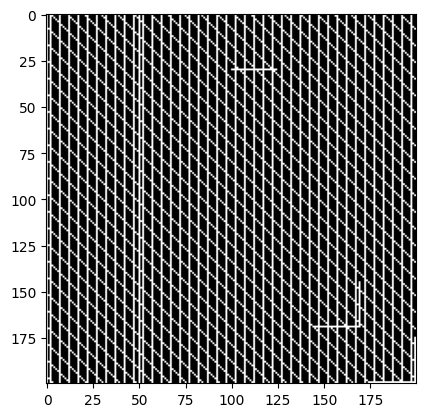

(240, 240)


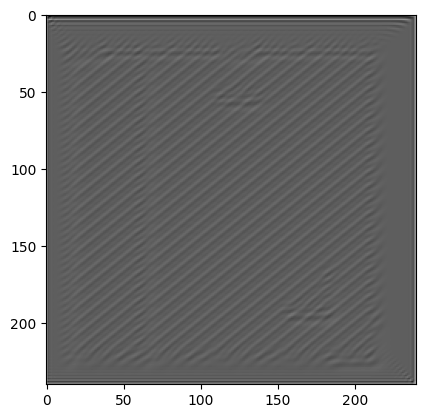

In [2]:
canvas = superimpose(generate_pattern('slant+'), generate_pattern('vert'))
        
add_artifact('vert_line', 1, 0, canvas)
add_artifact('vert_line', 1, 50, canvas)
add_artifact('rect', (1, 25), (0, 0), canvas)
add_artifact('rect', (1, 25), (0, 100), canvas)
add_artifact('rect', (1, 25), (30, 100), canvas)
add_artifact('rect', (1, 25), (199, 175), canvas)
add_artifact('rect', (25, 1), (175, 199), canvas)
add_artifact('rect', (1, 25), (169, 145), canvas)
add_artifact('rect', (25, 1), (145, 169), canvas)

load_img = (canvas > 0).astype(np.uint8)

filt = np.array([[1, 0, -1],
                 [1, 0, -1],
                 [1, 0, -1]])

filt = np.array([[1, 1, 1],
                 [0, 0, 0],
                 [-1, -1, -1]])

filt = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])

filt = np.array([[1, 1, .5],
                 [0, .1, 1],
                 [1, 1, 1.1]])

filt = np.array([[1, 1, 1, 1],
                 [1, 1, 1, 1],
                 [1, 1, 1, 1],
                 [1, 1, 1, 1]])
conv_img(load_img, rand_filter((3, 3), 17), 20)